In [1]:
from mhdd import MessageHDD

In [2]:
# this is a trick I have to do on my computer, totally optional, just import spacy however you can
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages')

import spacy

In [3]:
import pandas as pd

model = spacy.load("en_core_web_sm")

# create a lemmatizer to pass to our metric class
def lemmatize(text, lang='en', model=model):
    
    if not model:
        model = spacy.load("en_core_web_sm")
    doc = model(text)
    sent = []

    # remove puctuation and make all numbers the same token
    for word in doc:
        if word.pos_ not in ['NUM', 'PUNCT', 'SYM', 'X']:
            sent.append(word.lemma_.lower())
        elif word.pos_ == 'NUM':
            sent.append('NUMBER')
            
    return sent

In [9]:
# test it on the weezer review dataset
reviews = pd.read_json('weezer_reviews.json')

mhdd = MessageHDD(processor=lemmatize, mode='mean')
mhdd.fit(reviews['text'].tolist())
reviews['mhdd'] = mhdd.process_corpus()

100%|██████████| 851/851 [00:01<00:00, 820.03it/s]


In [10]:
pd.set_option('display.max_colwidth', 0)

In [29]:
# most diverse reviews
# sample albums, since low MHDD catches a lot of lemmatization problems (different languages, unrecognized typos, etc.)
reviews.sort_values('mhdd').head(100).sample(10)

,text,grade,album,target,mhdd
318,"This review contains spoilers, click expand to view.\n \n1994 brought the Blue album. I was barely a month old when the album released. A couple years later brought Pinkerton, an album that was shunned by most reviewers at release. While I may be ""too young"" to understand Weezer's impact on music at time of release, I can tell you that I know as much as any other older fan knows about the band. With that said, I have NO problem saying that this is the best record the band has made since Pinkerton. I am able to find high points in every record released, but I am also able to point out the lowpoints. This record has NO lowpoints. Sure, Back to the Shack may not be the greatest song ever released, but when listened to with the rest of the album, it sounds great. ""Ain't Got Nobody"" is the perfect opener, giving casual l that isteners a taste of the old Weezer that we have all longed for, mixed with a new energy. ""Eulogy For A Rock Band"" seems to be a homage to older bands that don't know when to quit (insert Weezer is too old joke here; they're not). ""Lonely Girl"" is a must-listen to any die-hard ""Green"" album fans. ""I've Had It Up To Here"" is an amazing song from all aspects, on my first listen, the falsettos by Rivers had me star struck. He's hit high notes before, but this is completely new. ""The British Are Coming"" is a lyrically playful, yet well put together song. I feel as if this may be the best composed song of them all, instrumentally speaking. ""Da Vinci"" and ""Go Away"" are some of my favorites, and should definitely be played on the radio, as they appeal to pop / alt / rock genres, without crossing into one genre alone. ""Cleopatra"" is a very unique song, with changes in time signature that could confuse the listener immediately. With that said, the solo sounds very Iron Maiden-esque to me (just my interpretation). Now on to ""Foolish Father"". Wow. I see this song as the closer of the album, even though there are three songs that follow. Sure, the song may seem a little ""weird"" at times, but for any ""Blue"" / ""Pinkerton"" fan, this song closes doors that were opened long ago. True Weezer fans understand what the father figure plays in the classic ""Say It Ain't So"", and this song is a complete 180 from that. If you're someone who values lyrics as much, or more than the instrumentals themselves, I recommend really listening to this song. Next comes ""The Futurescope Trilogy"". This is an entrance to a dimension that Weezer has never explored before. Consisting of three songs (only one having lyrics), it answers the question ""can Rivers really shred?"". The answer is yes. Thats all I want to give away. Please, PLEASE, listen to this album with an open mind. It is definitely in the top three for me, and a lot of other fans.… Expand",10.0,everything-will-be-alright-in-the-end,1,0.000813
208,"People don't realize that this is inspired by modern-pop, not meant to pander to those who listen to modern pop exclusively. People also don't realize that this is experimental, which means that the music put out by Weezer will sound different each time, as it has in the past 23 years. Comparing this to Raditude is unfair, because within the context of 2017 pop, this sounds more like MakePeople don't realize that this is inspired by modern-pop, not meant to pander to those who listen to modern pop exclusively. People also don't realize that this is experimental, which means that the music put out by Weezer will sound different each time, as it has in the past 23 years. Comparing this to Raditude is unfair, because within the context of 2017 pop, this sounds more like Make Believe. Most fans look back at the mid-late 2000's as one big pile of garbage, but if you actually take the time to listen to each of the albums, you will hear that each one sounds different than the last, and the so-called ""fans"" don't want Weezer to make anything that sounds different than what they're us

In [30]:
# least diverse reviews
reviews.sort_values('mhdd').tail(30)

,text,grade,album,target,mhdd
703,This is the kind of album that makes me feel good about the music year.,10.0,make-believe,1,0.011617
822,needs a couple more tracks to be perfect,9.0,weezer-2001,1,0.011735
757,A Bad Weezer Album. But it still rocks.,7.0,maladroit,1,0.011814
706,This is a great album. Perfect Situation could be the best Weezer song yet.,10.0,make-believe,1,0.011832
825,"This is a great album, though not as good as Pinkerton...",7.0,weezer-2001,1,0.012354
731,The pitchfork review makes me mad. 4? Are you kidding?,9.0,make-believe,1,0.012469
602,They are fantastic in red album! Love it!,10.0,weezer-red-album,1,0.013047
660,The first album to influence me to vacuum,1.0,make-believe,0,0.013226
707,Sounds like a bad Rooney album. I'm serious.,3.0,make-believe,0,0.013264
718,Brilliant album. Do not listen to the detracters.,10.0,make-believe,1,0.013493


In [23]:
sorted(mhdd.corpus_frequency_dict.items(), key=lambda x: x[1], reverse=True)[:30]

[('be', 4255),
 ('the', 3980),
 ('and', 2160),
 ('album', 2117),
 ('a', 2057),
 ('of', 1814),
 ('to', 1799),
 ('i', 1730),
 ('it', 1661),
 ('this', 1295),
 ('NUMBER', 1182),
 ('weezer', 1176),
 ('not', 1134),
 ('that', 1085),
 ('have', 884),
 ('in', 856),
 ('but', 766),
 ('song', 744),
 ('with', 641),
 ('on', 636),
 ('good', 635),
 ('as', 631),
 ('for', 600),
 ('do', 585),
 ('like', 533),
 ('you', 528),
 ('they', 508),
 (' ', 471),
 ('their', 449),
 ("'s", 416)]

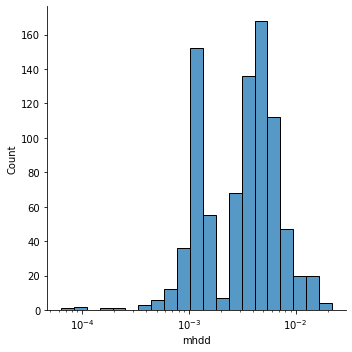

In [16]:
# distribution of the metric
import seaborn as sns
sns.displot(reviews['mhdd'], log_scale=True)

## try long reviews

In [20]:
diverse = 'i completely adore the penultimate creation of this prodigious collective'
non_diverse = 'love this weezer album, this is a good thing'

mhdd.fit([diverse, non_diverse])

In [21]:
mhdd.calculate(diverse)

0.009255459802490656

In [22]:
mhdd.calculate(non_diverse)

0.014045587195392681

## try shorter reviews

In [24]:
diverse = 'repulsive abomination'
non_diverse = 'not good'

mhdd.fit([diverse, non_diverse])

In [25]:
mhdd.calculate(diverse)

1.8037662638442642e-05

In [26]:
mhdd.calculate(non_diverse)

0.010587145759565153